In [41]:
import math 
import random
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
from __future__ import division
from scipy import linalg as sl
import mltools.transforms as trans


np.random.seed(0)
%matplotlib inline

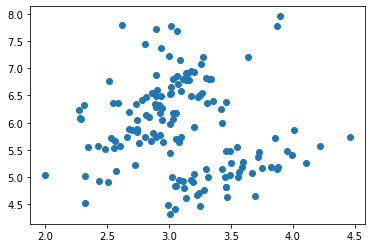

from the plot shown below, I think there are 2 clustered that possibly shown on the plot. The first cluster is on the left upper side of the plot and another cluster in on the right bottom of the plot


In [42]:
#1
iris = np.genfromtxt('data/iris.txt', delimiter=None)
X= iris[:,0:2]
Y= iris[:,-1]
plt.scatter(X[:,0],X[:,1])
plt.show()
print('from the plot shown below, I think there are 2 clustered that possibly shown on the plot. The first cluster is on the left upper side of the plot and another cluster in on the right bottom of the plot')

The second plot on each row is the plot with cluster centers


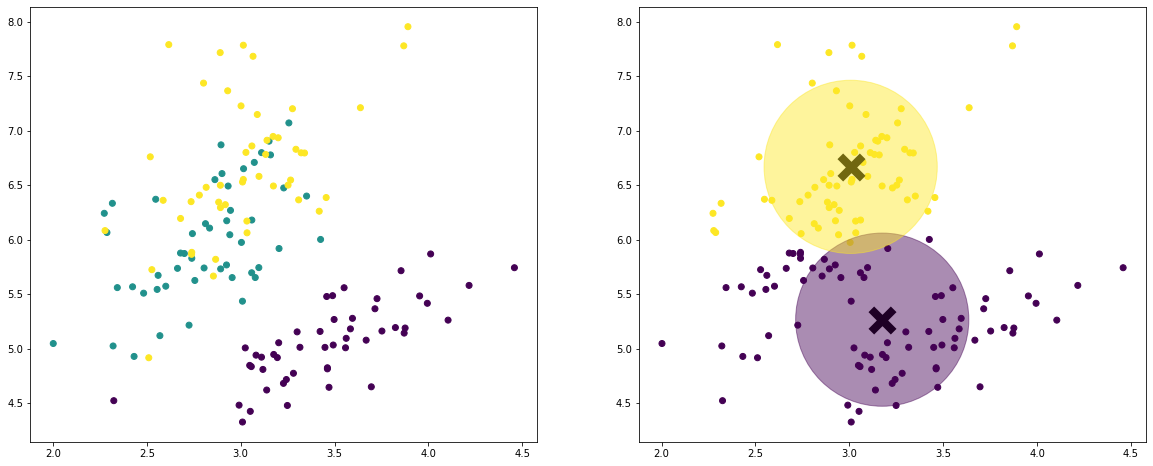

The second plot is the plot with cluster centers


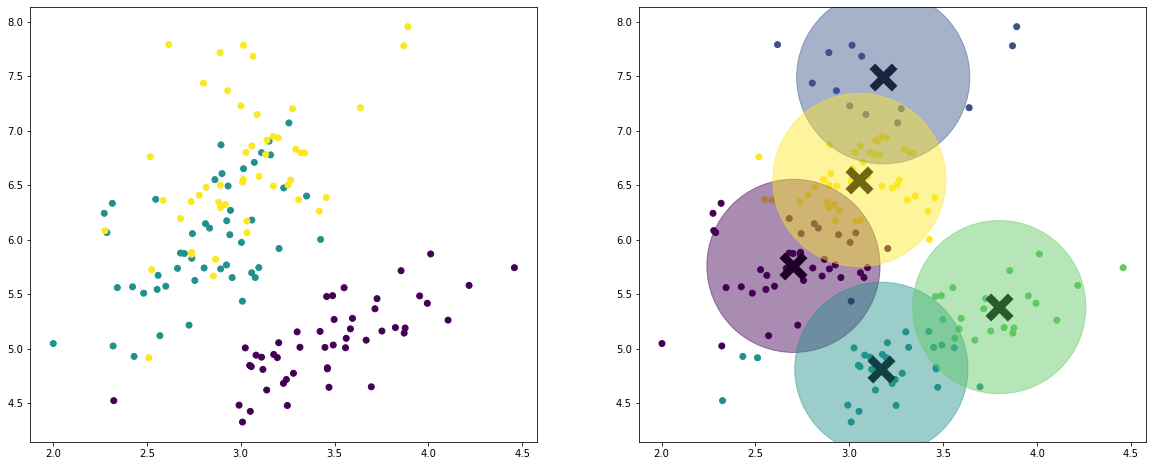

The second plot is the plot with cluster centers


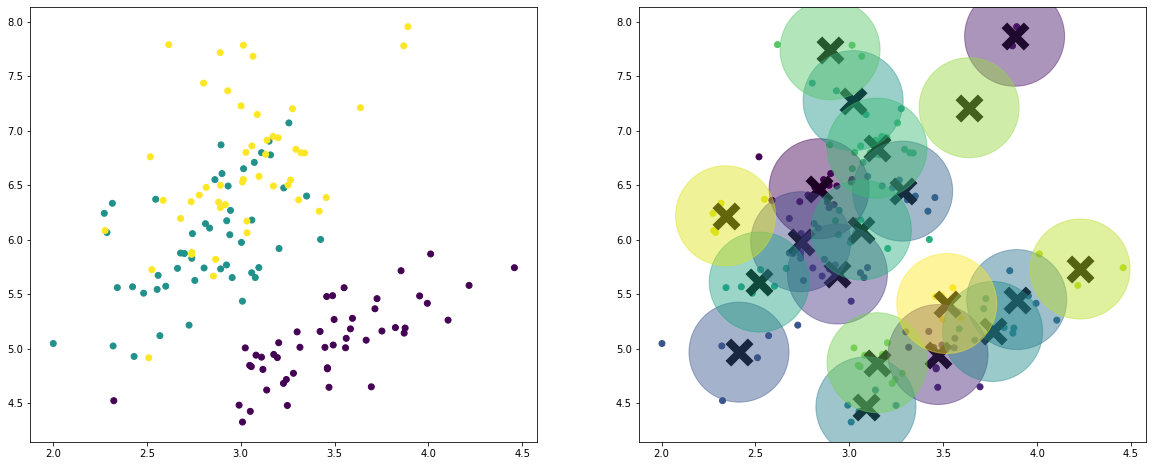

In [43]:
#1.2
print('The second plot on each row is the plot with cluster centers')
Z, mu, ssd = ml.cluster.kmeans(X, K=2, init='k++', max_iter=100)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# Plotting the original data
ax[0].scatter(X[:, 0], X[:, 1], c=Y)
# Plotting the clustered data
ax[1].scatter(X[:, 0], X[:, 1], c=Z) # Plotting the data
ax[1].scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) # Plotting the centroids
ax[1].scatter(mu[:, 0], mu[:, 1], s=30000, alpha=.45, c=np.unique(Z)) # Lazy way of plotting the clusters area :)
plt.show()
print('The second plot is the plot with cluster centers')
Z, mu, ssd = ml.cluster.kmeans(X, K=5, init='k++', max_iter=100)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# Plotting the original data
ax[0].scatter(X[:, 0], X[:, 1], c=Y)

# Plotting the clustered data
ax[1].scatter(X[:, 0], X[:, 1], c=Z) # Plotting the data
ax[1].scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) # Plotting the centroids
ax[1].scatter(mu[:, 0], mu[:, 1], s=30000, alpha=.45, c=np.unique(Z)) # Lazy way of plotting the clusters area :)
plt.show()
print('The second plot is the plot with cluster centers')
Z, mu, ssd = ml.cluster.kmeans(X, K=20, init='k++', max_iter=100)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# Plotting the original data
ax[0].scatter(X[:, 0], X[:, 1], c=Y)
# Plotting the clustered data
ax[1].scatter(X[:, 0], X[:, 1], c=Z) # Plotting the data
ax[1].scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) # Plotting the centroids
ax[1].scatter(mu[:, 0], mu[:, 1], s=10000, alpha=.45, c=np.unique(Z)) # Lazy way of plotting the clusters area :)
plt.show()


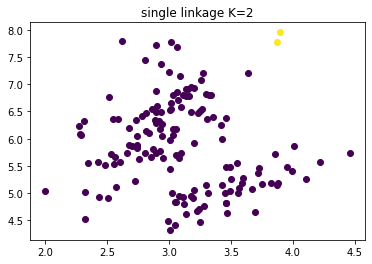

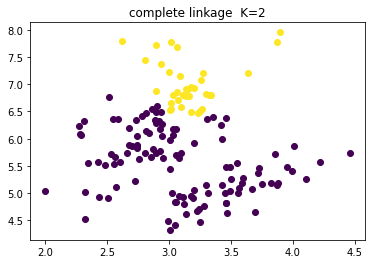

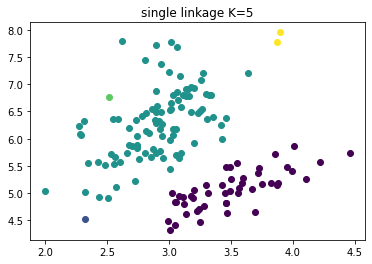

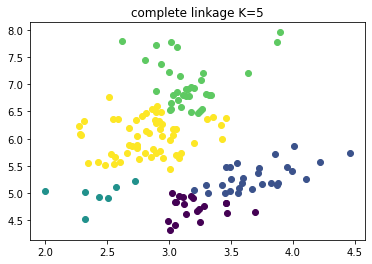

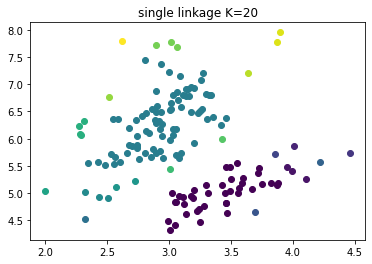

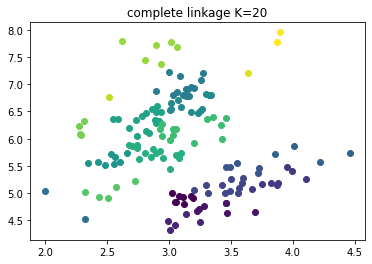

In [44]:
#1.3
plt.show()
a,b = ml.cluster.agglomerative(X, 2, method='min')
plt.title("single linkage K=2")
ml.plotClassify2D(None,X,a)
plt.show()
a,b = ml.cluster.agglomerative(X, 2, method='max')
plt.title("complete linkage  K=2")
ml.plotClassify2D(None,X,a)
plt.show()
a,b = ml.cluster.agglomerative(X, 5, method='min')
plt.title("single linkage K=5")
ml.plotClassify2D(None,X,a)
plt.show()
a,b = ml.cluster.agglomerative(X, 5, method='max')
plt.title("complete linkage K=5")
ml.plotClassify2D(None,X,a)
plt.show()
a,b = ml.cluster.agglomerative(X, 20, method='min')
plt.title("single linkage K=20")
ml.plotClassify2D(None,X,a)
plt.show()
a,b = ml.cluster.agglomerative(X, 20, method='max')
plt.title("complete linkage K=20")
ml.plotClassify2D(None,X,a)
plt.show()

In [45]:
#1.4
print('Compared with agglomerative clustering and k-means algorithms, Agglomerative clustering is hierarchical, and it finds closest data points to each other and successively groups together. Therefore, for both complete linkage and the single linkage produce the similar clusters on the plot each time. For K-means algorithms, the cluster starts from the random choice, so the result of k-mean cluster may differ from each time.')

Compared with agglomerative clustering and k-means algorithms, Agglomerative clustering is hierarchical, and it finds closest data points to each other and successively groups together. Therefore, for both complete linkage and the single linkage produce the similar clusters on the plot each time. For K-means algorithms, the cluster starts from the random choice, so the result of k-mean cluster may differ from each time.


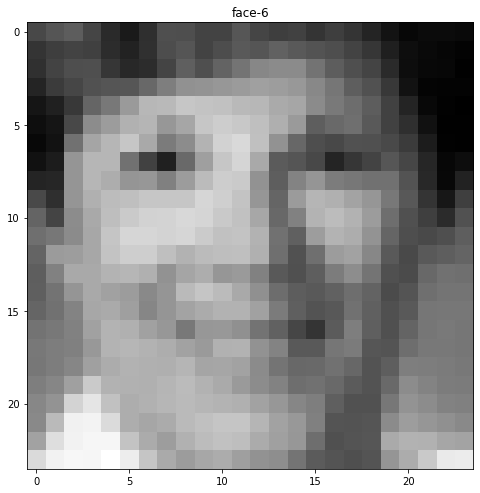

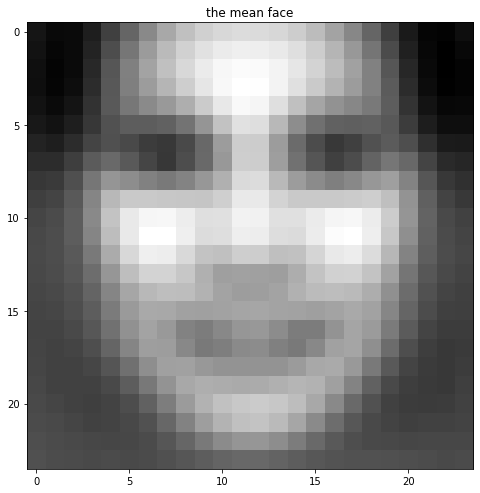

In [46]:
#2

X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure(figsize=(8, 9)); 
# pick a data point i for display
img = np.reshape(X[99,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint
plt.title('face-6')
plt.show()
mu = np.mean(X, axis=0)
plt.figure(figsize=(8, 9)); 
X_0 = X - np.mean(X, axis=0)
img = np.reshape(mu,(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray")
plt.title('the mean face')
plt.show()

In [47]:
#2.2

# from scipy import linalg as sl
X_0 = X - mu 
U,S,Vh = sl.svd(X_0, full_matrices= False) 
W = U.dot(np.diag(S) )
print('the shapes of W is', W.shape, 'and the shapes of Vh is',Vh.shape)


the shapes of W is (4916, 576) and the shapes of Vh is (576, 576)


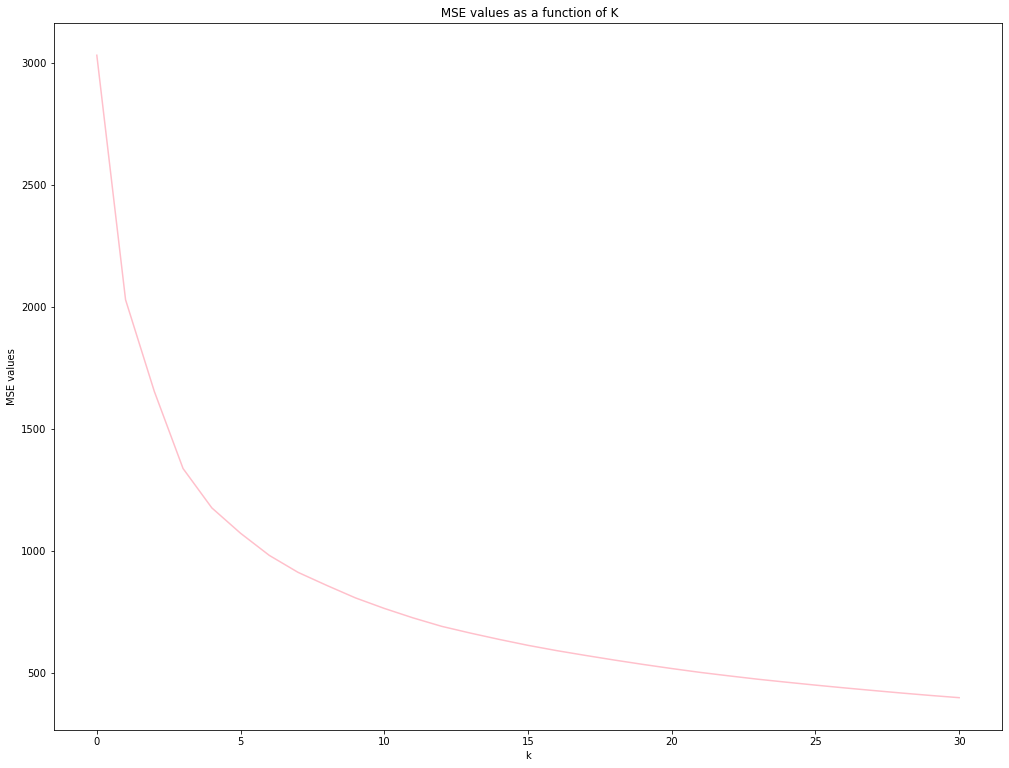

In [48]:
#2.3

final=[]
mu = np.mean(X, axis=0)
X_0 = X - mu 
for k in range(30+1):
    X_h = W[:,:k].dot(Vh[:k,:])
    final.append(np.mean((X_0 - X_h)**2)) 
plt.figure(figsize=(17, 13)); 
plt.plot(range(31),final,'pink')
plt.title(' MSE values as a function of K')
plt.ylabel('MSE values')
plt.xlabel('k')
plt.show()


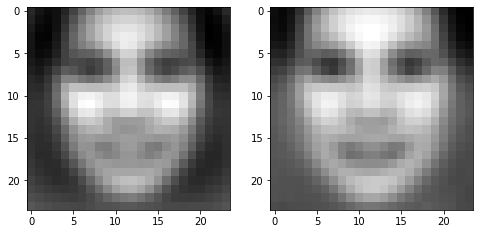

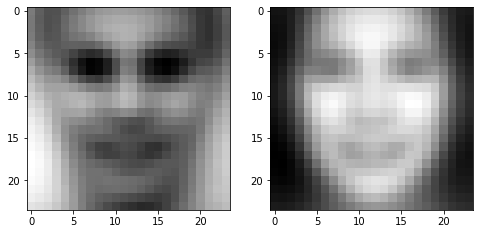

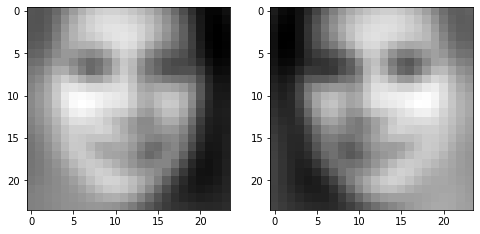

In [49]:
#2.4
for j in range(3):
    alpha=2*np.median(np.abs(W[:,j]))
    newa= mu+alpha*Vh[j,:]
    newb = mu-alpha*Vh[j,:]
    first = np.reshape(newa, (24,24)); 
    sec = np.reshape(newb, (24,24)); 
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(8, 9)); 
    ax1.imshow(first.T, cmap="gray"); 
    ax2.imshow(sec.T, cmap="gray");


any two faces and reconstruct them and I choose 12,22


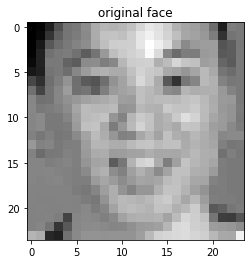

<Figure size 576x648 with 0 Axes>

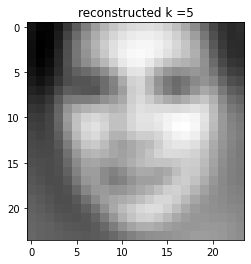

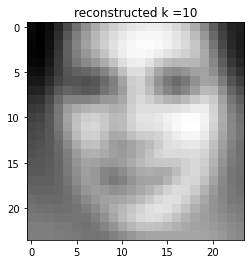

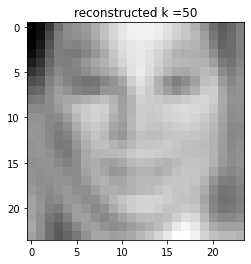

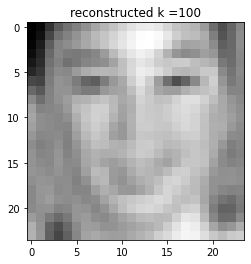

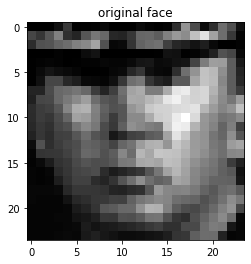

<Figure size 576x648 with 0 Axes>

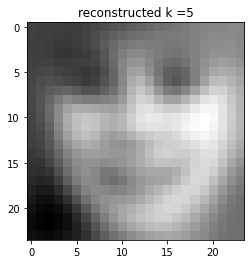

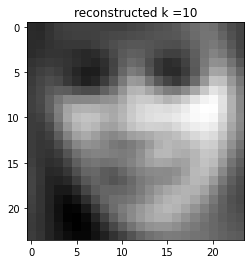

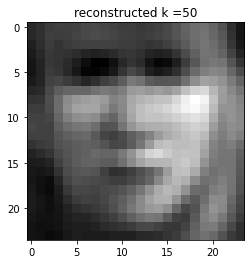

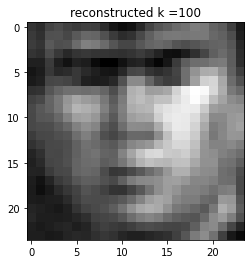

In [50]:
#2.5
# X_0 = X - mu 
# U,S,Vh = sl.svd(X_0, full_matrices= False) 
first = 12
second = 22
K = [5,10,50,100]
print('any two faces and reconstruct them and I choose 12,22')
img = np.reshape(X[first,:],(24,24)) 
plt.imshow(img.T, cmap="gray") 
plt.title('original face') 
plt.figure(figsize=(8, 9)); 
plt.show()
plt.figure() 
for k in K:
    img = np.reshape(mu+W[first,:k].dot(Vh[:k,:]),(24,24)) 
    plt.imshow(img.T, cmap="gray")
    plt.title('reconstructed k ='+str(k)) 
    plt.show()
img = np.reshape(X[second,:],(24,24)) 
plt.imshow(img.T, cmap="gray") 
plt.title('original face') 
plt.show()
plt.figure(figsize=(8, 9)); 
plt.figure() 
for k in K:
    img = np.reshape(mu+W[second,:k].dot(Vh[:k,:]),(24,24)) 
    plt.imshow(img.T, cmap="gray")
    plt.title('reconstructed k ='+str(k)) 
    plt.show()

This plot is a good way to gain intuition for what the PCA latent representation captures.


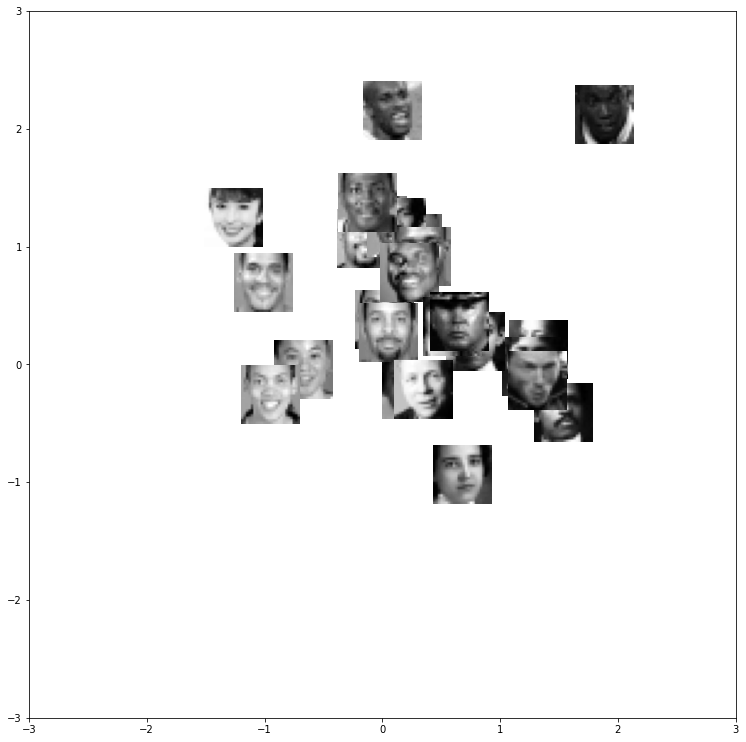

In [51]:
#2.6
idx =range(25)
import mltools.transforms 
coord,params = ml.transforms.rescale( W[:,0:2] )  # normalize scale of "W" locations
plt.figure(figsize=(17, 13)); 
for i in idx:
    # compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square 
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-3,3,-3,3) )
print('This plot is a good way to gain intuition for what the PCA latent representation captures.')

In [52]:
#3:
print('I followed the class guidelines below and worked alone')

I followed the class guidelines below and worked alone
